# Analysis - Interactions time 


In [6]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from utils.cuda_cluster import *
from utils.dataset import read_data, factorize_small_cardinality

import core.config as conf

In [7]:
client

Client Scheduler: tcp://127.0.0.1:44083 Dashboard: http://127.0.0.1:36827/status,Cluster Workers: 1 Cores: 1 Memory: 33.47 GB


## 1. Load data

In [8]:
# data_path = conf.raw_data_path + '*' # for all dataset
data_path = conf.raw_data_path + 'part-00175'
ori_df = read_data(data_path)

number of rows: 3033347


## 2. hour

In [24]:
df = ori_df[['tweet_timestamp']] # tweet create timestamp
df['hour'] = df['tweet_timestamp'].astype('datetime64[s]').dt.hour

In [15]:
df.head()

,tweet_timestamp,hour
id,,
1,1612993854,21
2,1612886900,16
3,1614019237,18
4,1612779567,10
5,1613822114,11


In [17]:
day_count= df['hour'].compute().value_counts().sort_index()
print(day_count)

0     111877
1     118483
2     133655
3     131991
4     104962
5      97624
6      94380
7      92521
8     102881
9     115580
10    121768
11    133782
12    143369
13    153184
14    158856
15    167019
16    149839
17    145813
18    137757
19    128732
20    126124
21    125724
22    123222
23    114204
Name: hour, dtype: int32


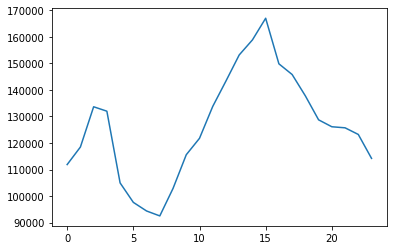

In [18]:
plt.plot(day_count.index.to_array(), day_count.values.get())
plt.show()

<BarContainer object of 24 artists>

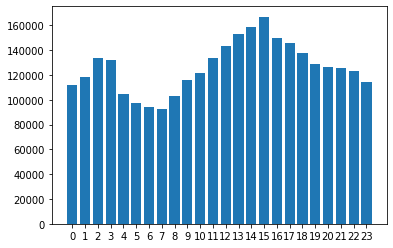

In [19]:
plt.xticks(range(0,24))
plt.bar(x=range(0,24), height=day_count.values.get())

## 3. weekday

In [25]:
df['weekday'] = df['tweet_timestamp'].astype('datetime64[s]').dt.weekday

In [26]:
df.head()

,tweet_timestamp,hour,weekday
id,,,
1,1612993854,21,2
2,1612886900,16,1
3,1614019237,18,0
4,1612779567,10,0
5,1613822114,11,5


In [45]:
day_count= df['weekday'].compute().value_counts().sort_index()
print(day_count)

0    440010
1    447876
2    429940
3    443872
4    434135
5    408131
6    429383
Name: weekday, dtype: int32


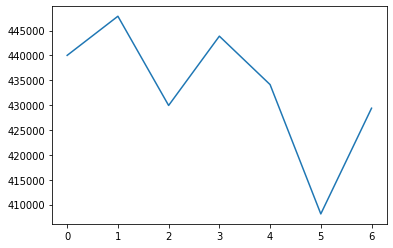

In [30]:
plt.plot(day_count.index.to_array(), day_count.values.get())
plt.show()

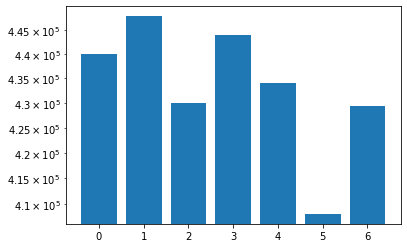

In [48]:
plt.bar(x=range(0,7), height=day_count.values.get())
plt.yscale("log")
plt.show()